# **Color Segmentation using GMM**

In [ ]:
# Download training images from Google Drive
import gdown
gdown.download_folder(id="18Mx2Xc9UNFZYajYu9vfmRFlFCcna5I0J", quiet=True, use_cookies=False)

['/content/train_images/68.jpg',
 '/content/train_images/76.jpg',
 '/content/train_images/91.jpg',
 '/content/train_images/99.jpg',
 '/content/train_images/106.jpg',
 '/content/train_images/114.jpg',
 '/content/train_images/121.jpg',
 '/content/train_images/137.jpg',
 '/content/train_images/144.jpg',
 '/content/train_images/152.jpg',
 '/content/train_images/160.jpg',
 '/content/train_images/168.jpg',
 '/content/train_images/176.jpg',
 '/content/train_images/192.jpg',
 '/content/train_images/200.jpg',
 '/content/train_images/208.jpg',
 '/content/train_images/216.jpg',
 '/content/train_images/223.jpg',
 '/content/train_images/231.jpg',
 '/content/train_images/248.jpg',
 '/content/train_images/256.jpg',
 '/content/train_images/264.jpg',
 '/content/train_images/280.jpg']

In [ ]:
# Download testing images from Google Drive
gdown.download_folder(id="1Yl4_5O_ZEkz_KJVs0_vS5TrZUqMYkwr4", quiet=True, use_cookies=False)

['/content/test_images/1.jpg',
 '/content/test_images/2.jpg',
 '/content/test_images/3.jpg',
 '/content/test_images/4.jpg',
 '/content/test_images/5.jpg',
 '/content/test_images/6.jpg',
 '/content/test_images/7.jpg',
 '/content/test_images/8.jpg']

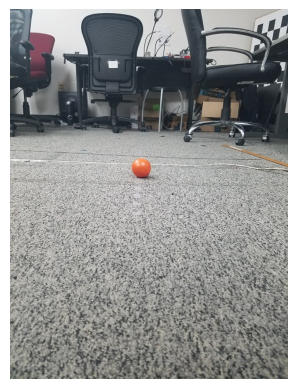

In [ ]:
# Check whether the training images were successfully imported
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

train_image = mpimg.imread('/content/train_images/106.jpg')
plt.imshow(train_image)
plt.axis("off")
plt.show()

### Cluster the orange ball using [Single Gaussian]( ) [30 points]

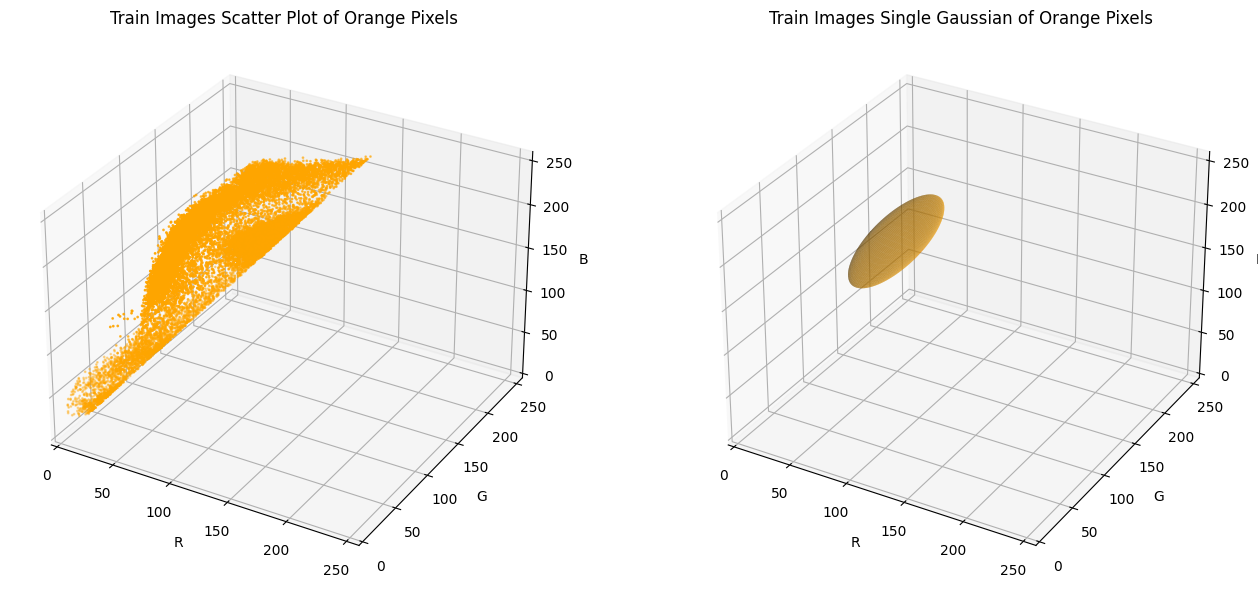

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# TODO: Read in training images
def read_imgs(folder):
    imgs = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            imgs.append(img)
    return imgs

# TODO: Iterate over training images to extract orange pixels using masks
def orange_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    light_orange = (0, 100, 20)
    dark_orange = (25, 255, 255)
    mask = cv2.inRange(hsv, light_orange, dark_orange)
    result = cv2.bitwise_and(img, img, mask=mask)
    return result, mask

# TODO: Compute mean and covariance using MLE(Maximum Likelihood Estimation)
def mle(pixels):
    mu = np.mean(pixels, axis=0)
    cov_matrix = np.cov(pixels, rowvar=False)
    return mu, cov_matrix

# TODO: Compute PDF(Probability Density Function) of single gaussian model
def pdf(X, mu, sigma):
    diff = X - mu
    inverse_covariance = np.linalg.inv(sigma)
    determinant = np.linalg.det(sigma)
    norm_const = 1.0 / (np.sqrt((2 * np.pi) ** 3) * np.sqrt(determinant))
    exponent = np.exp(-0.5 * np.sum(diff @ inverse_covariance * diff, axis=1))
    return norm_const * exponent

# TODO: Set parameters (threshold, prior)
def set_params():
  return 1e-7, 0.5

# get all orange pixels from training images
def all_orange_pixels(train_images):
    orange_pixels = []
    for img in train_images:
        result, mask = orange_mask(img)
        pixels = result[mask != 0].reshape(-1, 3)
        orange_pixels.append(pixels)
    return np.vstack(orange_pixels)

def plot_gaussian_ellipsoid(mu, cov, ax, alpha=0.5):
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # scale by eigenvalues & and rotate by eigenvectors
    ellipsoid_points = np.dot(np.column_stack((x.ravel(), y.ravel(), z.ravel())),
                               np.diag(np.sqrt(eigenvalues)))

    ellipsoid_points = ellipsoid_points @ eigenvectors.T

    # translate by mean
    ellipsoid_points += mu

    ellipsoid_points = ellipsoid_points.reshape(-1, 3)

    ax.plot_surface(ellipsoid_points[:, 0].reshape(100, 100),
                    ellipsoid_points[:, 1].reshape(100, 100),
                    ellipsoid_points[:, 2].reshape(100, 100),
                    color='orange', alpha=alpha)

train_images = read_imgs('/content/train_images/')
orange_pixels = all_orange_pixels(train_images)
mu, cov = mle(orange_pixels)

pdf_values = pdf(orange_pixels, mu, cov)
threshold, prior = set_params()
filtered_pixels = orange_pixels[(pdf_values * prior) > threshold]
filtered_mu, filtered_cov = mle(filtered_pixels)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(orange_pixels[:, 0], orange_pixels[:, 1], orange_pixels[:, 2], c='orange', s=1)
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_zlim(0, 255)
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
ax1.set_title('Train Images Scatter Plot of Orange Pixels')

ax2 = fig.add_subplot(122, projection='3d')
plot_gaussian_ellipsoid(filtered_mu, filtered_cov, ax2)
ax2.set_xlim(0, 255)
ax2.set_ylim(0, 255)
ax2.set_zlim(0, 255)
ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.set_title('Train Images Single Gaussian of Orange Pixels')

plt.tight_layout()
plt.show()

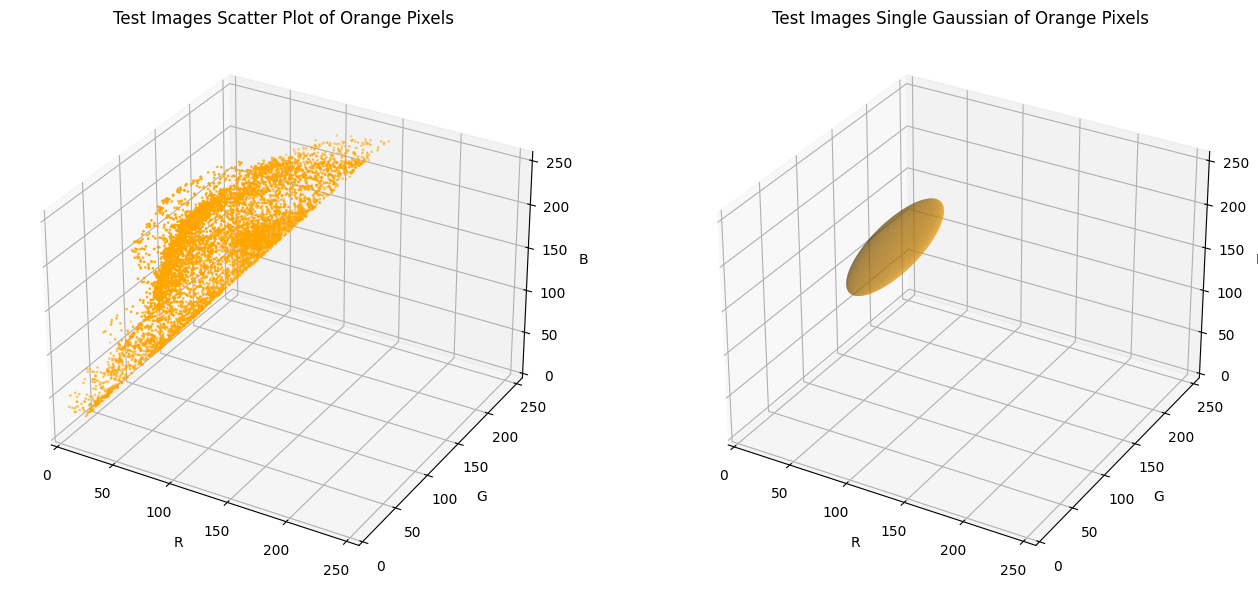

In [ ]:
test_images = read_imgs('/content/test_images/')
orange_pixels = all_orange_pixels(test_images)
mu, cov = mle(orange_pixels)

pdf_values = pdf(orange_pixels, mu, cov)
threshold, prior = set_params()
filtered_pixels = orange_pixels[(pdf_values * prior) > threshold]
filtered_mu, filtered_cov = mle(filtered_pixels)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(orange_pixels[:, 0], orange_pixels[:, 1], orange_pixels[:, 2], c='orange', s=1)
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_zlim(0, 255)
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
ax1.set_title('Test Images Scatter Plot of Orange Pixels')

ax2 = fig.add_subplot(122, projection='3d')
plot_gaussian_ellipsoid(filtered_mu, filtered_cov, ax2)
ax2.set_xlim(0, 255)
ax2.set_ylim(0, 255)
ax2.set_zlim(0, 255)
ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.set_title('Test Images Single Gaussian of Orange Pixels')

plt.tight_layout()
plt.show()

2. Write Python code to cluster the orange ball using [Gaussian Mixture Model](https://cmsc426.github.io/colorseg/#gmm) [40 points] and estimate the [distance](https://cmsc426.github.io/colorseg/#distest) to the ball [20 points]. Also, plot all the GMM ellipsoids [10 points].


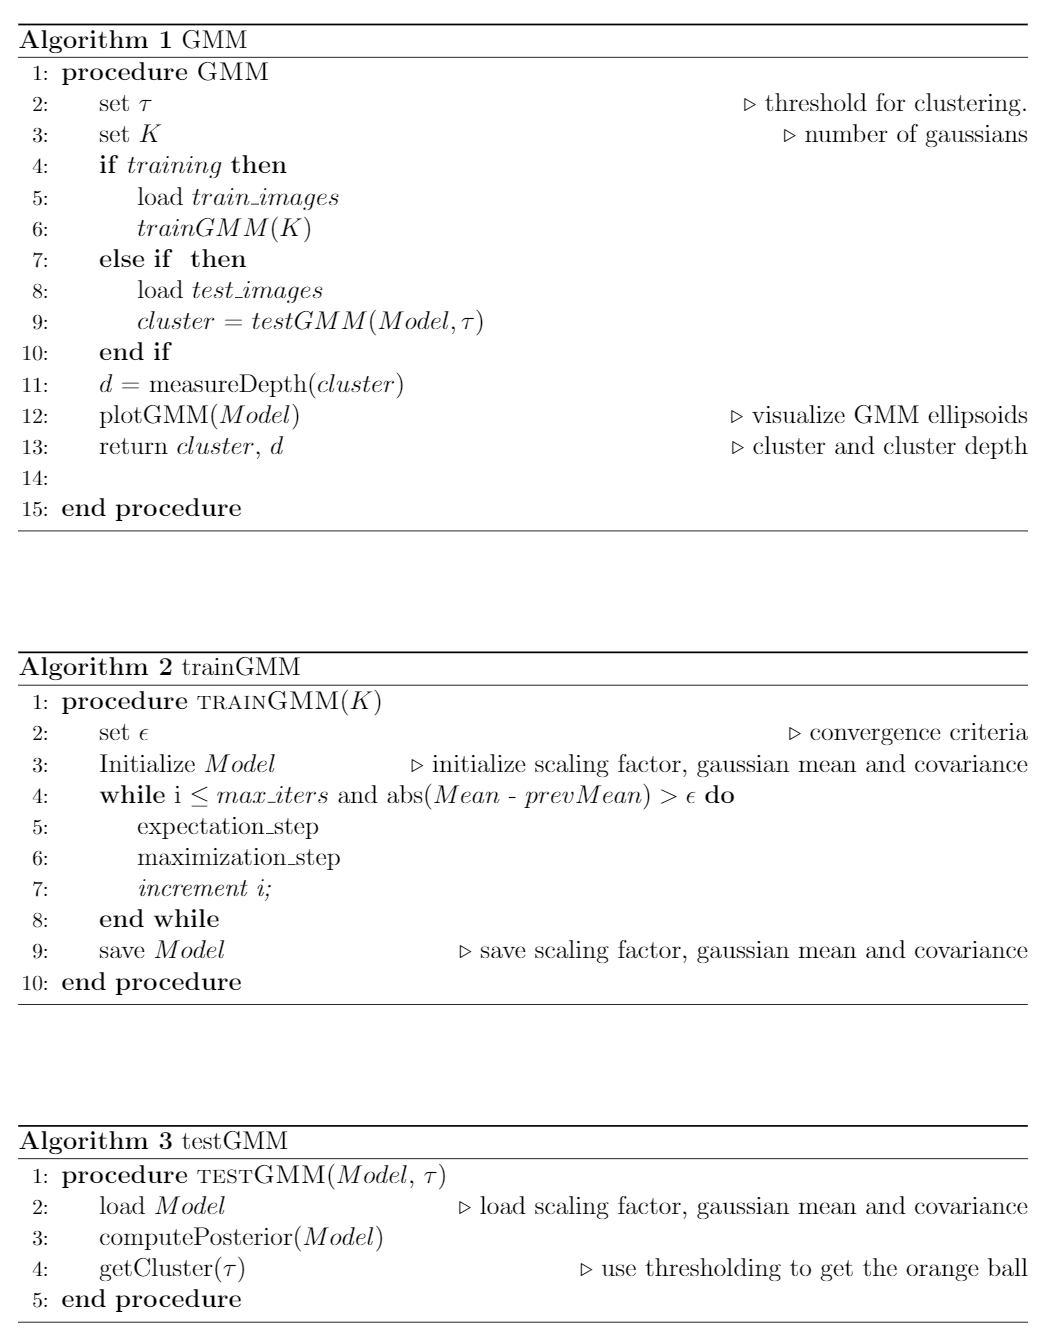

In [ ]:
def orange_mask(img):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  light_orange = (0, 100, 20)
  dark_orange = (25, 255, 255)

  mask = cv2.inRange(hsv, light_orange, dark_orange)
  result = cv2.bitwise_and(img, img, mask=mask)

  return hsv, result

# TODO: Compute mean and covariance using MLE(Maximum Likelihood Estimation)
def mle(img):
  if img.ndim > 1:
    mu = np.mean(img,axis = (0,1))
  else:
    mu = np.mean(img, axis=0)

  cov_matrix = np.eye(3)
  cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-5

  return mu,cov_matrix


# TODO: Compute PDF(Probability Density Function) of single gaussian model
#PDF for GMM
def pdf(X, mu, sigma):
    #Get the determinate of the covariance
    covariance_determinate = np.linalg.det(sigma)

    #Make Covariance regular
    inverse_covariance = np.linalg.pinv(sigma)
    normalize = 1 / np.sqrt((2 * np.pi) ** 3 * np.abs(covariance_determinate))

    # Get the difference from the pixel and the mean
    diff = X - mu

    #Exponent component
    exp_term = -0.5 * np.sum(diff @ inverse_covariance * diff, axis=1)
    exp = np.exp(exp_term)

    #Return pdf
    pdf_values = normalize * exp
    return pdf_values

In [ ]:
# method to do E step in GMM
def expectation_step(scalars, means, covariances, X):
    N = X.shape[0] # number of images, since we pass in flattened array
    K = len(means) # num gaussians
    # reset cluster weights to recompute with maximized parameters
    cluster_weights = np.zeros((N, K))

    for k in range(K):
        # weight of pixel existing in current cluster = curr pi * P(curr RGB given cluster i)
        try:
            pdf_k = pdf(X, means[k], covariances[k])
        except np.linalg.LinAlgError:
            # Handle singular covariance matrix
            cov_correction = covariances[k] + np.eye(covariances[k].shape[0]) * 1e-6
            pdf_k = pdf(X, means[k], cov_correction)
        cluster_weights[:, k] = scalars[k] * pdf_k

    # all cluster weights = sum of all pi * P(all RGB's given cluster K)
    total_cluster_weights = np.sum(cluster_weights, axis=1, keepdims=True)

    # avoid NaN error by setting to small val instead of 0
    total_cluster_weights[total_cluster_weights == 0] = 1e-10

    # probability data point j (all pixels in image) exists in cluster k
    cluster_weights /= total_cluster_weights

    return cluster_weights

# method to do maximization step in GMM
def maximization_step(cluster_weights, X):
    N, D = X.shape # extract num images* and dimensionality to properly reshape
    K = cluster_weights.shape[1]

    net_weights = np.sum(cluster_weights, axis=0)

    # Update scalars pi = sum weights / n
    scalars = net_weights / N

    # update means: sum of cluster weight * image / sum of all weights
    means = np.zeros((K, D))
    for k in range(K):
        means[k] = (1 / net_weights[k]) * np.sum(cluster_weights[:, k][:, np.newaxis] * X, axis=0)

    # pdate covariances
    covariances = np.zeros((K, D, D))
    for k in range(K):
        diff = X - means[k]
        # (sum of curr weight * diff * transpose) / sum weight
        weighted_diff = cluster_weights[:, k][:, np.newaxis] * diff
        cov_k = (1 / net_weights[k]) * np.dot(weighted_diff.T, diff)

        # Regularize by adding a small val * identity matrix to the diagonal
        covariances[k] = cov_k + np.eye(D) * 1e-6

    return scalars, means, covariances

def trainGMM(K, X, threshold, max_iters):
    N, D = X.shape
    # Initialize K random scalars and normalize them so they all add to 1
    scalars = np.random.rand(K)
    scalars /= np.sum(scalars)

    # Initialize means with random points
    initial_indices = np.random.choice(N, K, replace=False)
    means = X[initial_indices]

    # Initialize covariances randomly and add identity matrix * constant
    covariances = np.array([np.cov(X, rowvar=False) + np.eye(D) * 1e-6 for _ in range(K)])

    prev_means = np.copy(means)

    for i in range(max_iters):
        # E-step
        cluster_weights = expectation_step(scalars, means, covariances, X)

        # M-step
        scalars, means, covariances = maximization_step(cluster_weights, X)

        print(f"Iteration {i+1}")

        # Check for convergence based on change in means
        if np.all(np.abs(means - prev_means) < threshold):
            print("Converged")
            break

        prev_means = np.copy(means)

    return scalars, means, covariances

In [ ]:
def testGMM(K, scalars, means, covariances, threshold, prior=0.5):
    cluster_parameters = []

    for img_idx, img in enumerate(test_images):
      #get the width and height of the image
        height, width, _ = img.shape
        #reshape the image to get RGB and normalize it to make RGB between 0,1
        pixels = img.reshape(-1, 3) / 255.0
        #Holds the coordinates for the orange pixels
        orange_pixels = []
        #Holds the probabilites
        probabilities = np.zeros(len(pixels))


        #Loops through the components in GMM
        for i in range(K):
          #makes covariance regular
          regularized_cov = covariances[i] + np.eye(covariances[i].shape[0]) * 1e-6
          #Get the pdf of each pixel
          pdf_values = scalars[i] * pdf(pixels, means[i], regularized_cov)
          #Gets combined probabilities
          probabilities += pdf_values
        #Calculates postrior probability like in Single Gaussian
        mask = probabilities * prior > threshold
        #Gets the pixels that are orange
        indices = np.where(mask)[0]
        #Loops through orange pixels and adds that point to a cluster
        for idx in indices:
            row, col = divmod(idx, width)
            orange_pixels.append((row, col))


        #adds the cluster for each image
        cluster_parameters.append(orange_pixels)
    #returns clusters of orange pixels across all images
    return cluster_parameters

In [ ]:
def plotGMM(scalars, means, covariances, title, distance=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(means)):
        mean = means[i]
        cov = covariances[i]
        plot_gaussian_ellipsoid(mean, cov, ax, alpha=0.5)

    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title)

    plt.show()

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Converged


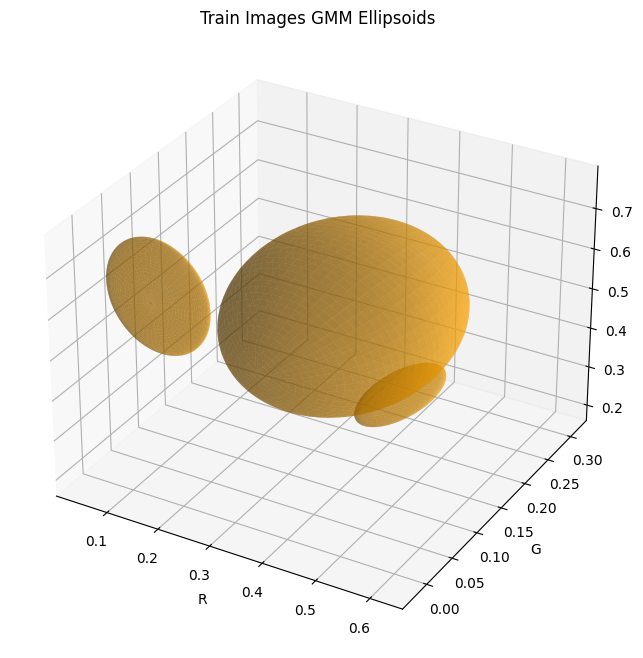

In [ ]:
# Prepare the training data
train_images = []
for img in read_imgs('/content/train_images/'):
    # mask image and reshape to get RGB
    masked_img = orange_mask(img)[0]
    train_images.append(masked_img.reshape(-1, 3))

# combine into single array to avoid later shape errors
X = np.vstack(train_images)
# Normalize pixel values to [0, 1]
X = X / 255.0

K = 3  # Number of clusters
threshold = 0.01
max_iters = 100
train_scalars, train_means, train_covariances = trainGMM(K, X, threshold, 25)

plotGMM(train_scalars, train_means, train_covariances, "Train Images GMM Ellipsoids")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Converged


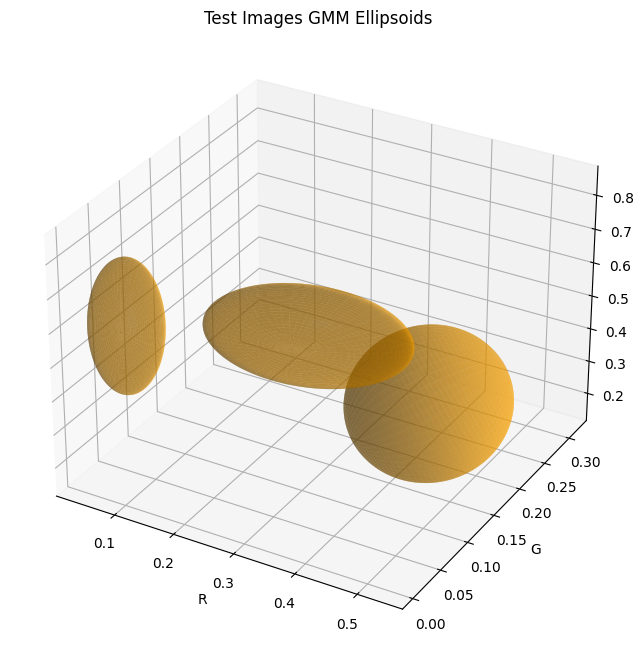

In [ ]:
test_images = []
for img in read_imgs('/content/test_images/'):
    # mask image and reshape to get RGB
    masked_img = orange_mask(img)[0]
    test_images.append(masked_img.reshape(-1, 3))

# combine into single array to avoid later shape errors
X = np.vstack(test_images)
# Normalize pixel values to [0, 1]
X = X / 255.0

K = 3  # Number of clusters
threshold = 0.01
max_iters = 100
test_scalars, test_means, test_covariances = trainGMM(K, X, threshold, 25)

plotGMM(test_scalars, test_means, test_covariances, "Test Images GMM Ellipsoids")

In [ ]:
def measureDepth(cluster_parameters, image_width, image_height, k):
    distances = []

    for orange_pixels in cluster_parameters:
        # empty image mask
        mask = np.zeros((image_height, image_width), dtype=np.uint8)

        # orange pixels = 1 in the mask
        for pixel in orange_pixels:
            row, col = pixel
            # make sure coords are inside image
            if 0 <= row < image_height and 0 <= col < image_width:
                mask[row, col] = 1

        # morphology operations
        kernel = np.ones((5, 5), np.uint8)
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

        # Label connected components in the mask
        labeled_mask, num_features = label(mask_cleaned)

        # find largest area of regions
        props = regionprops(labeled_mask)
        largest_area = max(props, key=lambda x: x.area)
        area = largest_area.area

        # inverse square curve
        distance = k / np.sqrt(area)
        distances.append(distance)

    return distances

In [ ]:
from scipy.ndimage import label
from skimage.measure import regionprops

k = 500 # calibration constant

train_images = read_imgs('/content/train_images/')

image_height, image_width, _ = train_images[0].shape
cluster_parameters = testGMM(K, train_scalars, train_means, train_covariances, threshold)
distances = measureDepth(cluster_parameters, image_width, image_height, k)

print()
for idx, distance in enumerate(distances):
    print(f"Train Image {idx+1}: distance to the ball is {distance:.2f} units")


Train Image 1: distance to the ball is 1.83 units
Train Image 2: distance to the ball is 1.87 units
Train Image 3: distance to the ball is 1.86 units
Train Image 4: distance to the ball is 1.84 units
Train Image 5: distance to the ball is 1.88 units
Train Image 6: distance to the ball is 1.85 units
Train Image 7: distance to the ball is 1.86 units
Train Image 8: distance to the ball is 1.86 units
Train Image 9: distance to the ball is 1.86 units
Train Image 10: distance to the ball is 1.87 units
Train Image 11: distance to the ball is 1.81 units
Train Image 12: distance to the ball is 1.87 units
Train Image 13: distance to the ball is 1.85 units
Train Image 14: distance to the ball is 1.83 units
Train Image 15: distance to the ball is 1.85 units
Train Image 16: distance to the ball is 1.86 units
Train Image 17: distance to the ball is 1.83 units
Train Image 18: distance to the ball is 1.85 units
Train Image 19: distance to the ball is 1.86 units
Train Image 20: distance to the ball is

In [ ]:
from scipy.ndimage import label
from skimage.measure import regionprops

k = 500 # calibration constant

test_images = read_imgs('/content/test_images/')

image_height, image_width, _ = test_images[0].shape
cluster_parameters = testGMM(K, test_scalars, test_means, test_covariances, threshold)
distances = measureDepth(cluster_parameters, image_width, image_height, k)

print()
for idx, distance in enumerate(distances):
    print(f"Test Image {idx+1}: distance to the ball is {distance:.2f} units")


Test Image 1: distance to the ball is 1.78 units
Test Image 2: distance to the ball is 1.78 units
Test Image 3: distance to the ball is 1.80 units
Test Image 4: distance to the ball is 1.78 units
Test Image 5: distance to the ball is 1.80 units
Test Image 6: distance to the ball is 1.78 units
Test Image 7: distance to the ball is 1.79 units
Test Image 8: distance to the ball is 1.84 units


For our choice of color space, we started in an RGB color space and then switched to an HSV color space in order to get the lower and upper bound for orange.  The scalars were initialized by randomly selecting K coefficients and normalizing them to make sure the sum of all of them was 1. The mean initialization was done by getting a random sample of the images and finding the mean of them. The covariance part was done by initializing an array of covariance matrices that are set to be the 3 x 3 identity matrix. The number of gaussians in the GMM is three because if there were too many there would be too much noise. Using 3 gaussians simplifies the process and only captures the data needed.

GMM is better than a single gaussian because a simple gaussian model cannot take into account different lighting conditions. A GMM’s ability to capture multiple clusters of similar colors allows for more accurate models, especially in complex images.

This is our distance estimate and cluster segmentation results for each image:
Image 1:
Detected 113829 orange pixels
Estimated distance to the ball is 1.85 units
Image 2:
Detected 106912 orange pixels
Estimated distance to the ball is 2.12 units
Image 3:
Detected 119983 orange pixels
 Estimated distance to the ball is 1.85 units
Image 4:
Detected 108716 orange pixels
Estimated distance to the ball is 2.13 units
Image 5:
Detected 108309 orange pixels
Estimated distance to the ball is 2.11 units
Image 6:
Detected 103517 orange pixels
Estimated distance to the ball is 1.85 units
Image 7:
Detected 119693 orange pixels
Estimated distance to the ball is 1.87 units
Image 8:
Detected 129401 orange pixels
Estimated distance to the ball is 1.84 units

Our algorithm failed on some test images because of the apple. This is because the apple is too similar to an orange, as some characteristics of the apple fall under the characteristics of the orange. It is hard to differentiate between the actual orange pixel and the apple pixels, since they are pretty similar. The limitations of our algorithm are that  pixels with similar traits to an orange pixel will be characterized as orange. The strengths of the algorithm are that it can get many shades of orange and can work in different lighting.

In order to create the single gaussian model in part 1, we first masked every training image and aggregated all orange pixels. We then found the mean and covariance of the aggregate and calculated the multivariate gaussian pdf. The mle function computes the mean and covariance of the orange pixels. The pdf function computes the pdf to filter the pixels. The orange_mask function isolates the orange pixels by converting the image from BGR to HSV and applies the mask between the light and dark orange ranges we defined. The all_orange_pixels function gets all the orange pixels from the training images. To plot this, we created an ellipsoid and then took the covariance matrix of the pdf. We found the eigenvector and eigenvalue of the covariance matrix which helped us to orient and scale the ellipsoid.

One problem we encountered in part 1 was the plotting of the ellipsoid. This is because our ellipsoid represented all orange pixels, as we did not first filter the noise. Our solution to this was to call the pdf function to filter and then plot using the new mean and covariance.

 Our implementation for the trainGMM function was done by first initializing random scalars, mean, and covariance. We then wrote the E-step. In the E-step, each pixel in an image is assigned to one of the clusters. The probability of the pixel belonging to each cluster is then calculated using the scalars, means, and covariances, following the formula. The probabilities are then normalized to get the probability of that pixel belonging to a specific cluster. We then wrote the M-step. It updates the means by calculating a weighted sum of pixels assigned to each cluster, the scalars by recalculating how likely a pixel belongs to that cluster, and the covariances by calculating how much the pixels vary from the means. After all this, we were able to write the trainGMM method following algorithm 2.

In the trainGMM function in part 2 of the project, we ran into problems when trying to implement the maximization step.This is because we were getting an “operands could not be broadcast together with shapes (307200,) (307200,3)” error. We were able to solve this error by adding a lot of print statements to print out the shape of each variable, to identify what exactly was giving us the issue. After doing so, we were able to realize that we needed to reshape the weights of the clusters. Another error we got was the denominator was 0 in the maximization equation, so we got a NaN. We were able to solve this by adding a constant to the covariance matrix.

For testGMM in part 2, we got all the testing images and used the scalars, means, and covariances we trained. We then calculated if the pixel was orange or not. If it was, we added that point in the image to a cluster and added all orange pixels to a list for each image.

For measureDepth in part 2, we found the range of the orange pixel coordinates. We used the clusters in testGMM which gave all the coordinates of the orange pixels in the test image. We were able to find the orange ball by getting the region with the most orange pixels which was the orange ball. We then calculated the distance using the inverse square curve formula. A problem we encountered for this function was figuring out where the orange ball was. We overcame this by calculating the largest area of orange pixels to get the orange ball area and calculate the distance.